In [1]:
try:
        
    import h5py
    
    from ipywidgets import widgets, Layout, interact, interactive, interactive_output, Dropdown
    from IPython.display import display
    import matplotlib.pyplot as mplt
    import scipy
    from sympy import symbols, Eq, solve
    import numpy as np
    import random
    import seaborn as sns 
    import pandas as pd
    import graphing as gr
    #!pip install viola
    ########## Modules required for artist drawing on matplotlib
    import matplotlib.path as mpath
    import matplotlib.lines as mlines
    import matplotlib.patches as mpatches
    from matplotlib.collections import PatchCollection
    
      
except ModuleNotFoundError:
        print("A class you are trying to import is not present in the directory")
    
except Exception:
        print("Something went wrong - modules have not been imported")

else: 
    print("All relevant classes imported")

All relevant classes imported


In [3]:
#######################################################
#### GUI 

edt_filename_1 = widgets.Text(description = 'File1 (-0.85)', value=' Exp4-N')

btn_select = widgets.Button(description = 'Select files',button_style='success')
output_file = widgets.Output()

display(edt_filename_1, btn_select,output_file)



#######################################################
#### FUNCTIONS


#df_flux = pd.DataFrame({'Compartment':[],'Na_net':[], 'Na_leak':[],'Na_Atpase':[], 'K_net':[],'K_leak':[],'K_Atpase':[],'K_kcc2':[], 'Cl_net':[],'Cl_kcc2':[],'X':[],'z':[]  })
df_ed = pd.DataFrame({'Boundary':[],'Na':[],'K':[],'Cl':[]})



def btn_select_clicked(b):
    
    
    global filename_1 
    
    filename_1 = "\\"
    filename_1 = filename_1 + edt_filename_1.value 
    
    
    
    
    ##### FILE 1 data
    
    try: 
        with h5py.File(filename_1, mode='r') as hdf:
            
            print(filename_1+" file found... loading content") 
            global C, comp_names_arr, intervals, interval_arr, f1_v_arr,t_arr
            C = hdf.get('COMPARTMENTS')
            C_group_arr =[]
            t_arr_bool = True
            comp_names_arr= list(C.keys())
            print(comp_names_arr)            
            C1 = C.get(comp_names_arr[0])
            
            T = hdf.get('TIMING')
            total_t = T.get('TOTAL_T')[()]
            intervals = T.get('INTERVALS')[()]
            dt = T.get("DT")[()]
   
            
            total_steps = total_t /dt          
            interval_step = total_steps / intervals
            interval_arr = [round(interval_step * i) for i in range(intervals)]
            

            t_arr =[]
            f1_v_arr = []        
            ##### LOADING COMPARTMENT DATA
            
            for i in range(len(comp_names_arr)):
                C_group = C.get(comp_names_arr[i])
                C_group_arr.append(C_group)
                v_arr = []
                for j in range(len(list(C_group.keys()))):
                    dataset = C_group.get(str(interval_arr[j]))
                    v_arr.append(dataset[-3]*1e3)
                    if t_arr_bool == True:
                        t_arr.append(dataset[0])
                f1_v_arr.append(v_arr)    
                t_arr_bool = False
                
            print(filename_1+" content loaded into memory") 
            
    except: 
        raise(filename_1+" not found")
        raise("File needs to be in base directory")
        
        

btn_select.on_click(btn_select_clicked)

Text(value=' Exp4-N', description='File1 (-0.85)')

Button(button_style='success', description='Select files', style=ButtonStyle())

Output()

\ Exp4-2_current file found... loading content
['Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7', 'Comp8', 'Comp9']
\ Exp4-2_current content loaded into memory


## Importing NEURON Data

In [4]:
global csv_array
with open("Main_sim_results_csv.csv") as file_name:
    csv_array = np.loadtxt(file_name, delimiter=";")

print("NEURON data imported")

v_neur_arr =[]
main_arr =list(csv_array)
comp_names_arr = ["Comp1","Comp2","Comp3","Comp4","Comp5","Comp6","Comp7","Comp8","Comp9"]
t_neur_arr = [float(main_arr[i][0]) for i in range(len(main_arr))]
v_neur_arr.append([float(main_arr[j][1]) for j in range(len(main_arr))])
v_neur_arr.append([float(main_arr[j][2]) for j in range(len(main_arr))])
v_neur_arr.append([float(main_arr[j][3]) for j in range(len(main_arr))])
v_neur_arr.append([float(main_arr[j][4]) for j in range(len(main_arr))])
v_neur_arr.append([float(main_arr[j][5]) for j in range(len(main_arr))])
v_neur_arr.append([float(main_arr[j][6]) for j in range(len(main_arr))])
v_neur_arr.append([float(main_arr[j][7]) for j in range(len(main_arr))])
v_neur_arr.append([float(main_arr[j][8]) for j in range(len(main_arr))])
v_neur_arr.append([float(main_arr[j][9]) for j in range(len(main_arr))])




NEURON data imported


## Voltage traces and heatmaps

In [24]:
print(len(t_arr))
print(intervals)

total_t = 100e-3
interval_step = total_t/intervals
t2_arr = [i*interval_step for i in range(intervals)] #in s
t3_arr = [i*interval_step*1e3 for i in range(intervals)] #in ms
print(t2_arr[-1])
print(t3_arr[-1])

100000
100000
0.09999899999999999
99.999


[Text(0, 0.5, 'Comp9'),
 Text(0, 1.5, 'Comp8'),
 Text(0, 2.5, 'Comp7'),
 Text(0, 3.5, 'Comp6'),
 Text(0, 4.5, 'Comp5'),
 Text(0, 5.5, 'Comp4'),
 Text(0, 6.5, 'Comp3'),
 Text(0, 7.5, 'Comp2'),
 Text(0, 8.5, 'Comp1')]

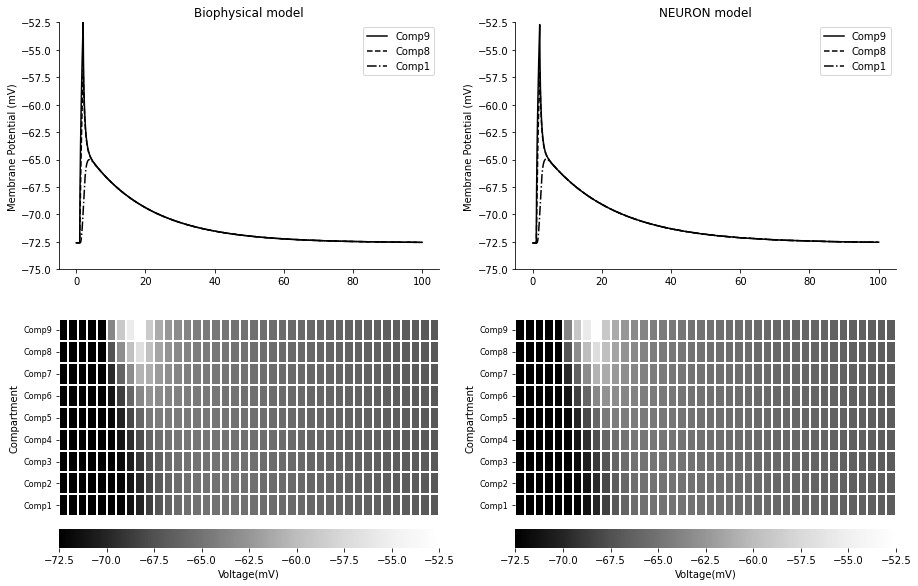

In [25]:

f4a, [(ax1,ax2),(ax3,ax4)] = mplt.subplots(2,2,figsize=(15,10), sharey=False, sharex=False) 
sns.despine()



##### TOP ROW
v_arr = [f1_v_arr[8][j]for j in range(len(t_arr))]
ax1.plot(t3_arr[::], v_arr[::],'-', label="Comp9",color='#000000')
ax1.set_title("Biophysical model")

v_arr = [f1_v_arr[7][j] for j in range(len(t_arr))]
ax1.plot(t3_arr[::], v_arr[::], '--',  label="Comp8",color='#000000')

v_arr = [f1_v_arr[1][j] for j in range(len(t_arr))]
ax1.plot(t3_arr[::], v_arr[::], '-.', label="Comp1",color='#000000')
ax1.legend()

#ax1.get_xaxis().set_visible(False)
ax1.set_ylabel("Membrane Potential (mV)")
ax1.set_ylim([-75,-52.5])
#ax1.set_yticks([-70,-65,-60,-55])


ax2.plot(t_neur_arr, v_neur_arr[8],'-', label="Comp9",color='#000000')
ax2.set_title("NEURON model")


ax2.plot(t_neur_arr, v_neur_arr[7], '--',  label="Comp8",color='#000000')

ax2.plot(t_neur_arr, v_neur_arr[0], '-.', label="Comp1",color='#000000')
ax2.legend()
ax2.set_ylim([-75,-52.5])
ax2.set_xlabel("Time (ms)",visible=False)
#ax2.get_xaxis().set_visible(False)
ax2.set_ylabel("Membrane Potential (mV)")

#########################################################
### BOTTOM ROW
######################################################

vm_arr = []  
for i in range(len(f1_v_arr)):
    temp_vm_arr = [f1_v_arr[i][j] for j in range(len(f1_v_arr[0]))]
    vm_arr.append(temp_vm_arr[:10000:250])

comp_names_arr = ["Comp1","Comp2","Comp3","Comp4","Comp5","Comp6","Comp7","Comp8","Comp9"]    
vm_arr.reverse()
#, vmin= -72.5, vmax=-52.5,
g_vm = sns.heatmap(vm_arr,cmap="Greys_r", vmin= -72.5, vmax=-52.5,ax=ax3,xticklabels=False, cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'horizontal' },linewidth=0.01 )
g_vm.set_ylabel("Compartment",fontsize=10)
g_vm.set_yticklabels(comp_names_arr[::-1], fontsize=8, rotation=0)
        #left_ax_vm.set_title("Vm in each compartment",fontsize=10)    


    
comp_names_arr = ["Comp1","Comp2","Comp3","Comp4","Comp5","Comp6","Comp7","Comp8","Comp9"]
vm_arr = []  
for i in range(len(v_neur_arr)):
    temp_vm_arr = [v_neur_arr[i][j] for j in range(len(v_neur_arr[0]))]
    vm_arr.append(temp_vm_arr[:1000:25])

    
vm_arr.reverse()
#, vmin= -72.5, vmax=-52.5,
g_vm = sns.heatmap(vm_arr,cmap="Greys_r", ax=ax4, vmin= -72.5, vmax=-52.5,xticklabels=False, cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'horizontal' },linewidth=0.01 )
g_vm.set_ylabel("Compartment",fontsize=10)
g_vm.set_yticklabels(comp_names_arr[::-1], fontsize=8, rotation=0)
        #left_ax_vm.set_title("Vm in each compartment",fontsize=10)    


#####


## Time and length constants

BIOPHYSICAL
2002
Vmax: -52.459239764961914mV
Time of Vmax: 2000999999.9999413ms
---------
Vmin: -72.54518285433804mV
Time of Vmin: 99998000000.07933ms
---------
4582
Vtau: -65.11338391126887mV
Time of Vtau: 4.582ms
---------
---------
Tau = 2.58ms
---------
---------
NEURON
200
Vmax: -52.7109mV
Time of Vmax: 198999999.99999952ms
---------
Vmin: -72.5357mV
Time of Vmin: 99998000000.07933ms
---------
499
Vtau: -65.200524mV
Time of Vtau: 498000000.00000566s
---------
---------
Tau = 2.99ms
---------
---------
[-52.459239764961914, -56.840509834334235, -60.22381693224948, -62.6905886570885, -64.26940018729658, -64.79577000558236, -64.9413678948352, -65.00927219050719, -65.03836549947226]
12.579125734510349
R² = 0.9935224612501411
Y = 17.15120374125914 * e^(-0.02383330653270101 * x) + -65.71367005850507
49.040435070284786
[-52.7109, -57.0181, -60.3333, -62.734, -64.2549, -64.7376, -64.8692, -64.9307, -64.9571]
12.246199999999995
R² = 0.9934293409020556
Y = 16.732095403486298 * e^(-0.0241738

Text(90, -58, 'Lambda = 48.57 um')

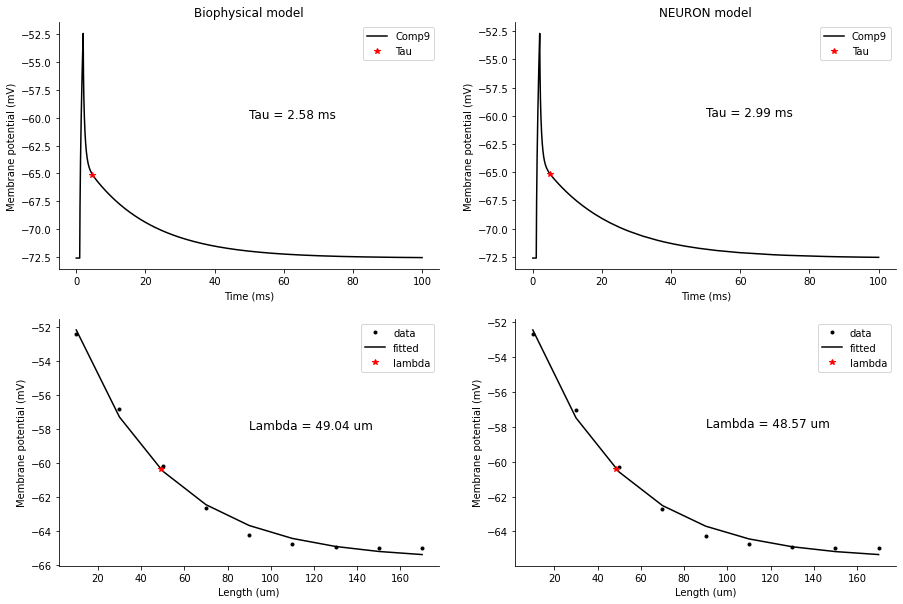

In [31]:

f4b, [(ax1,ax2),(ax3,ax4)] = mplt.subplots(2,2,figsize=(15,10), sharey=False, sharex=False) 
sns.despine()

#t_arr = [t_arr[i]*1e3 for i in range(len(t_arr))]

############################################
##### TOP ROW: Time constants - BIOPHYSICAL
###########################################
comp_names_arr = ["Comp1","Comp2","Comp3","Comp4","Comp5","Comp6","Comp7","Comp8","Comp9"]
ax1.plot(t3_arr[:],f1_v_arr[8][:], label= comp_names_arr[8], color='black')
ax1.set_ylabel("Membrane potential (mV)")
ax1.set_xlabel("Time (ms)")
ax1.set_title("Biophysical model")
ax1.legend()

vmax = v_arr[0]
vmin = v_arr[-1]
vmax_index = 0
vmin_index = -1

for i in range(len(f1_v_arr[8])):
    if vmax<f1_v_arr[8][i]:
        vmax = f1_v_arr[8][i]
        vmax_index = i
    if i>2000 and round(vmin,2)>round(f1_v_arr[8][i],2): 
        vmin = f1_v_arr[8][i]
        vmin_index = i

print("BIOPHYSICAL")
print(vmax_index)
print("Vmax: " + str(vmax) +"mV")
print("Time of Vmax: " + str(t_arr[vmax_index]) + "ms")
print("---------")
print("Vmin: " + str(vmin) +"mV")
print("Time of Vmin: " + str(t_arr[vmin_index]) + "ms")
print("---------")

vdiff = vmax-vmin
vtau = vmax - 0.63*(vdiff)
vtau_index = 0


for j in range(len(f1_v_arr[8])):
    if (j>1990) and (round(f1_v_arr[8][j],1) == round(vtau,1)):
        vtau_index = j
        break

print(vtau_index)

print("Vtau: " + str(vtau) +"mV")
print("Time of Vtau: " + str(t3_arr[vtau_index]) + "ms")

tau = t3_arr[vtau_index] - t3_arr[vmax_index]

ax1.plot(t3_arr[vtau_index], vtau,'r*',label="Tau")
ax1.legend()
tau_string = "Tau = "+str(round(tau,2))+' ms'
ax1.text(50, -60, tau_string, fontsize = 12)

print("---------")
print("---------")
print("Tau = " + str(tau) +"ms")
print("---------")
print("---------")



############################################
##### TOP ROW: Time constants - NEURON
###########################################
comp_names_arr = ["Comp1","Comp2","Comp3","Comp4","Comp5","Comp6","Comp7","Comp8","Comp9"]
ax2.plot(t_neur_arr[:],v_neur_arr[8], label= comp_names_arr[8], color='black')
ax2.set_ylabel("Membrane potential (mV)")
ax2.set_xlabel("Time (ms)")
ax2.set_title("NEURON model")
ax2.legend()
global vmax_index, vmax, vtau,tau

vmax = v_neur_arr[8][0]
vmin = v_neur_arr[8][-1]
vmax_index = 0
vmin_index = -1


for i in range(5000):
    if vmax < v_neur_arr[8][i]:
        vmax = v_neur_arr[8][i]
        vmax_index = i
    if i>2000 and round(vmin,0)>round(v_neur_arr[8][i],0): 
        vmin = v_neur_arr[8][i]
        vmin_index = i

print("NEURON")
print(vmax_index)
print("Vmax: " + str(vmax) +"mV")
print("Time of Vmax: " + str(t_arr[vmax_index]) + "ms")
print("---------")
print("Vmin: " + str(vmin) +"mV")
print("Time of Vmin: " + str(t_arr[vmin_index]) + "ms")
print("---------")

vdiff = vmax-vmin
vtau = vmax - 0.63*(vdiff)
vtau_index = 0


for j in range(len(t_neur_arr)):
    if (round(v_neur_arr[8][j],1) == round(vtau,1)):
        vtau_index = j
        break
        
print(vtau_index)

print("Vtau: " + str(vtau) +"mV")
print("Time of Vtau: " + str(t_arr[vtau_index]) + "s")

tau = t_neur_arr[vtau_index] - t_neur_arr[vmax_index]

ax2.plot(t_neur_arr[vtau_index], vtau,'r*', label="Tau")
ax2.legend()

tau_string = "Tau = "+str(round(tau,2))+' ms'
ax2.text(50, -60 , tau_string, fontsize = 12)
print("---------")
print("---------")
print("Tau = " + str(tau) +"ms")
print("---------")
print("---------")






########################################################
######## BOTTOM ROW: length constants - BIOPHYSICAL
#######################################################




v_max_arr = []
len_arr = [10,30,50,70,90,110,130,150,170]
for i in range(len(comp_names_arr)):
    
    max=-72.5
    
    for j in range(10000):
        if f1_v_arr[i][j] > max:
            max = f1_v_arr[i][j]
        
    v_max_arr.append(max)
# perform the fit



#v_max_arr = [-52.7109, -57.0181, -60.3333, -62.734, -64.2549, -64.7376, -64.8692, -64.9307, -64.9571]
len_arr = [10,30,50,70,90,110,130,150,170]
v_max_arr.reverse()

global x_lambda
print(v_max_arr)
v_max = v_max_arr[0]
v_diff = v_max_arr[0]-v_max_arr[8]
print(v_diff)
v_lambda = v_max_arr[0]-0.63*v_diff


x_data = np.array(len_arr)
y_data = np.array(v_max_arr)

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

p0 = (2000, .1, 50) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, len_arr, v_max_arr, p0)
m, t, b = params
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate


# determine quality of the fit
squaredDiffs = np.square(y_data - monoExp(x_data, m, t, b))
squaredDiffsFromMean = np.square(y_data - np.mean(y_data))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results

y_curve_arr = [monoExp(len_arr[i], m, t, b) for i in range(len(len_arr))]


ax3.plot(len_arr, v_max_arr, '.', label="data", color='black')
ax3.plot(len_arr, y_curve_arr, '-', label="fitted", color='black')
ax3.set_ylabel("Membrane potential (mV)")
ax3.set_xlabel("Length (um)")
#ax_1.title("Fitted Exponential Curve")



# inspect the parameters
print(f"Y = {m} * e^(-{t} * x) + {b}")
#print(f"Tau = {tauSec * 1e6} µs")



############## FIND LAMBDA


y_lambda = v_lambda
x_lambda = np.log((y_lambda-b)/m)/-t
print(x_lambda)

ax3.plot(x_lambda,y_lambda,'*',color='red',label='lambda')
ax3.legend()
lambda_string = "Lambda = "+str(round(x_lambda,2))+' um'
ax3.text(90, -58 , lambda_string, fontsize = 12)
########################################################
######## BOTTOM ROW: length constants - NEURON
#######################################################



v_max_arr = []
len_arr = [10,30,50,70,90,110,130,150,170]
for i in range(len(comp_names_arr)):
    
    max=-72.5
    
    for j in range(5000):
        if v_neur_arr[i][j] > max:
            max = v_neur_arr[i][j]
        
    v_max_arr.append(max)
# perform the fit



#v_max_arr = [-52.7109, -57.0181, -60.3333, -62.734, -64.2549, -64.7376, -64.8692, -64.9307, -64.9571]
len_arr = [10,30,50,70,90,110,130,150,170]
v_max_arr.reverse()

global x_lambda
print(v_max_arr)
v_max = v_max_arr[0]
v_diff = v_max_arr[0]-v_max_arr[8]
print(v_diff)
v_lambda = v_max_arr[0]-0.63*v_diff


x_data = np.array(len_arr)
y_data = np.array(v_max_arr)

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

p0 = (2000, .1, 50) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, len_arr, v_max_arr, p0)
m, t, b = params
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate


# determine quality of the fit
squaredDiffs = np.square(y_data - monoExp(x_data, m, t, b))
squaredDiffsFromMean = np.square(y_data - np.mean(y_data))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results

y_curve_arr = [monoExp(len_arr[i], m, t, b) for i in range(len(len_arr))]


ax4.plot(len_arr, v_max_arr, '.', label="data", color='black')
ax4.plot(len_arr, y_curve_arr, '-', label="fitted", color='black')
ax4.set_ylabel("Membrane potential (mV)")
ax4.set_xlabel("Length (um)")
#ax_1.title("Fitted Exponential Curve")



# inspect the parameters
print(f"Y = {m} * e^(-{t} * x) + {b}")
#print(f"Tau = {tauSec * 1e6} µs")



############## FIND LAMBDA


y_lambda = v_lambda
x_lambda = np.log((y_lambda-b)/m)/-t
print(x_lambda)

ax4.plot(x_lambda,y_lambda,'*',color='red',label='lambda')
ax4.legend()
lambda_string = "Lambda = "+str(round(x_lambda,2))+' um'
ax4.text(90, -58 , lambda_string, fontsize = 12)


[-52.7109, -57.0181, -60.3333, -62.734, -64.2549, -64.7376, -64.8692, -64.9307, -64.9571]
12.246199999999995
R² = 0.9934293409020556
Y = 16.732095403486298 * e^(-0.024173893838661344 * x) + -65.59744623129289
48.57213069662617


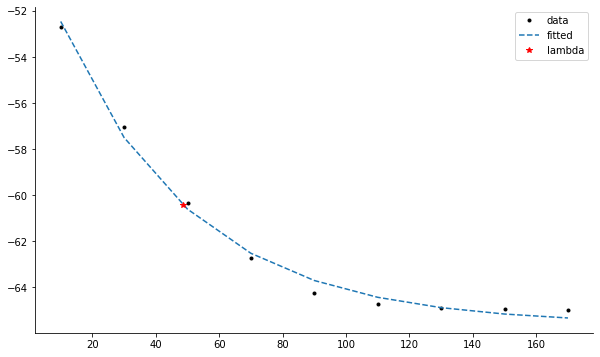

In [7]:
v_max_arr = []
len_arr = [10,30,50,70,90,110,130,150,170]
for i in range(len(comp_names_arr)):
    
    max=-72.5
    
    for j in range(500):
        if v_neur_arr[i][j] > max:
            max = v_neur_arr[i][j]
        
    v_max_arr.append(max)
# perform the fit



#v_max_arr = [-52.7109, -57.0181, -60.3333, -62.734, -64.2549, -64.7376, -64.8692, -64.9307, -64.9571]
len_arr = [10,30,50,70,90,110,130,150,170]
v_max_arr.reverse()

global x_lambda
print(v_max_arr)
v_max = v_max_arr[0]
v_diff = v_max_arr[0]-v_max_arr[8]
print(v_diff)
v_lambda = v_max_arr[0]-0.63*v_diff


x_data = np.array(len_arr)
y_data = np.array(v_max_arr)

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

p0 = (2000, .1, 50) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, len_arr, v_max_arr, p0)
m, t, b = params
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate


# determine quality of the fit
squaredDiffs = np.square(y_data - monoExp(x_data, m, t, b))
squaredDiffsFromMean = np.square(y_data - np.mean(y_data))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results


f_lenconstant, ax_1 = mplt.subplots(1,figsize=(10,6), sharex=False,sharey=True) 

y_curve_arr = [monoExp(len_arr[i], m, t, b) for i in range(len(len_arr))]


ax_1.plot(len_arr, v_max_arr, '.', label="data", color='black')
ax_1.plot(len_arr, y_curve_arr, '--', label="fitted")
#ax_1.title("Fitted Exponential Curve")



# inspect the parameters
print(f"Y = {m} * e^(-{t} * x) + {b}")
#print(f"Tau = {tauSec * 1e6} µs")



############## FIND LAMBDA


y_lambda = v_lambda
x_lambda = np.log((y_lambda-b)/m)/-t
print(x_lambda)

ax_1.plot(x_lambda,y_lambda,'*',color='red',label='lambda')

ax_1.legend()
sns.despine()

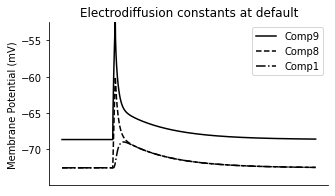

In [8]:
f4a, (ax_2) = mplt.subplots(1,1,figsize=(5,3), sharey=True, sharex=True) 
sns.despine()




#### Z = -0.85
v_arr = [f1_v_arr[8][j]for j in range(len(t_arr))]
ax_2.plot(t_arr[::], v_arr[::],'-', label="Comp9",color='#000000')
ax_2.set_title("Electrodiffusion constants at default")

v_arr = [f1_v_arr[7][j] for j in range(len(t_arr))]
ax_2.plot(t_arr[:], v_arr[::], '--',  label="Comp8",color='#000000')

v_arr = [f1_v_arr[0][j] for j in range(len(t_arr))]
ax_2.plot(t_arr[::], v_arr[::], '-.', label="Comp1",color='#000000')
ax_2.legend()

ax_2.get_xaxis().set_visible(False)
ax_2.set_ylabel("Membrane Potential (mV)")
ax_2.set_ylim([-75,-52.5])
ax_2.set_yticks([-70,-65,-60,-55])

Button(button_style='success', description='Plot 4B', style=ButtonStyle())

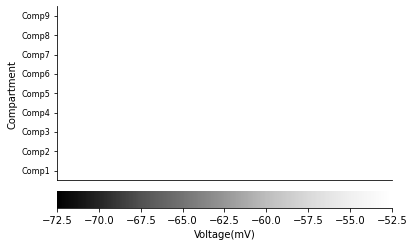

In [11]:
######
btn_plot_4b = widgets.Button(description="Plot 4B", button_style='success')
display(btn_plot_4b)
#####
vm_arr =[]


def btn_plot_4b_clicked(b):
        
    
    for i in range(len(f1_v_arr)):
        #vm_arr = [f1_v_arr[i][j]*1e3 for j in range(len(f1_v_arr[0]))]
        vm_arr.append(f1_v_arr[i])

    
    vm_arr.reverse()

    g_vm = sns.heatmap(vm_arr,cmap="Greys_r",xticklabels=False, vmin= -72.5, vmax=-52.5, cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'horizontal' },linewidth=0.01 )
    g_vm.set_ylabel("Compartment",fontsize=10)
    g_vm.set_yticklabels(comp_names_arr[::-1], fontsize=8, rotation=0)
        #left_ax_vm.set_title("Vm in each compartment",fontsize=10)    


    sns.despine()
#####
btn_plot_4b.on_click(btn_plot_4b_clicked)